In [53]:
# Render our plots inline
%matplotlib inline
%pylab inline  
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


Populating the interactive namespace from numpy and matplotlib


In [54]:
# General Plotting Parameters
mpl.rcParams['figure.figsize'] = (8,5)
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['font.size'] = 14.
mpl.rcParams['legend.fontsize'] = 12.
mpl.rcParams['axes.labelsize'] = 12.
mpl.rcParams['xtick.labelsize'] = 10.
mpl.rcParams['ytick.labelsize'] = 10.
mpl.rcParams['xtick.minor.pad'] = 4
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
#Git says this is patched, but it doesn't work from Pip --upgrade 26-mar-2015
#mpl.rcParams['xtick.minor.visible'] = True  

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14),
             (255, 187, 120), (44, 160, 44), (152, 223, 138),
              (148, 103, 189),
             (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127),
             (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229),(214, 39, 40), (255, 152, 150)]  
    
# Scale the RGB values to the [0, 1] range,
# which is the format matplotlib accepts.  
for i in range(len(tableau20)): 
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

# Specific Plotting Params
i_leu = 0
i_delta = 2
i_heu = 4

ps = 0

compare Random (FixedSeed) Processing through Cyclist to Cyan (or Every)

In [55]:
dir = 'data/cyan_tests/'
man_E1 = dir + 'run-man.csv'
man_R1 = dir + 'run-man-R1.csv'

#raw_man_E1 = pd.read_csv(man_E1) 
raw_man_E1 = pd.read_csv(man_R1) 


In [56]:
#cyan_16 = dir + 'run-1-fac-16.dat'
#cyan_17 = dir + 'run-1-fac-17.dat'
#cyan_18 = dir + 'run-1-fac-18.dat'

cyan_16 = dir + 'run-1-fac-16-R1.dat'
cyan_17 = dir + 'run-1-fac-17-R1.dat'
cyan_18 = dir + 'run-1-fac-18-R1.dat'

raw_cyan_16 = pd.read_csv(cyan_16,sep='\s+')
raw_cyan_17 = pd.read_csv(cyan_17,sep='\s+')
raw_cyan_18 = pd.read_csv(cyan_18,sep='\s+')

In [57]:
man_LEU_E1 = raw_man_E1[raw_man_E1['Prototype'] == "LEU"].reset_index(drop=True)
man_delta_LEU_E1 = raw_man_E1[raw_man_E1['Prototype'] == "delta_LEU"].reset_index(drop=True)
man_covert_HEU_E1 = raw_man_E1[raw_man_E1['Prototype'] == "covert_HEU"].reset_index(drop=True)


In [58]:
cyan_LEU_tp = raw_cyan_16['Quantity'] - raw_cyan_16['Quantity'].shift(1)
cyan_delta_LEU_tp = raw_cyan_17['Quantity'] - raw_cyan_17['Quantity'].shift(1)
cyan_covert_HEU_tp = raw_cyan_18['Quantity'] - raw_cyan_18['Quantity'].shift(1)


In [59]:
man_LEU_tp_E1 =(man_LEU_E1[' Quantity']- man_LEU_E1[' Quantity'].shift(1))
man_delta_LEU_tp_E1 =  man_delta_LEU_E1[' Quantity']- man_delta_LEU_E1[' Quantity'].shift(1)
man_covert_HEU_tp_E1 =  man_covert_HEU_E1[' Quantity']- man_covert_HEU_E1[' Quantity'].shift(1)

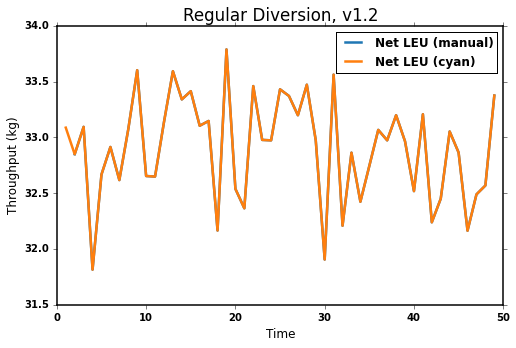

In [60]:
plt.plot(man_LEU_E1['Time'],(man_LEU_tp_E1), label='Net LEU (manual)', color=tableau20[i_leu])
plt.plot(raw_cyan_16['Time'],(cyan_LEU_tp), label='Net LEU (cyan)', color=tableau20[i_leu+2])

plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("Regular Diversion, v1.2")

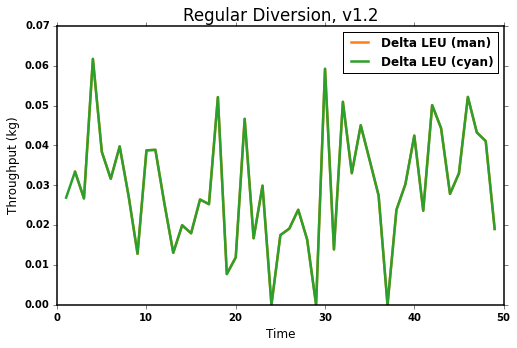

In [61]:
plt.plot(man_delta_LEU_E1['Time'],(man_delta_LEU_tp_E1), label='Delta LEU (man)', color=tableau20[i_delta])
plt.plot(raw_cyan_17['Time'],(cyan_delta_LEU_tp), label='Delta LEU (cyan)', color=tableau20[i_delta+2])

plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("Regular Diversion, v1.2")

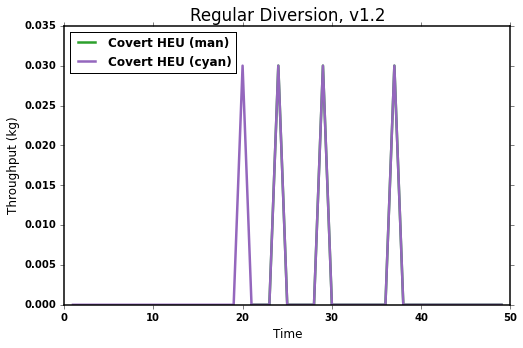

In [62]:
plt.plot(man_covert_HEU_E1['Time'],(man_covert_HEU_tp_E1), label='Covert HEU (man)', color=tableau20[i_heu])
plt.plot(raw_cyan_18['Time'],(cyan_covert_HEU_tp), label='Covert HEU (cyan)', color=tableau20[i_heu+2])

plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("Regular Diversion, v1.2")

Check Seeding Random on Time



In [63]:
no_seed_16 = dir + '16_time_seed_no.sqlite.dat'
no_seed_18 = dir + '18_time_seed_no.sqlite.dat'
L_seed_16 = dir + '16_time_seed_L1.sqlite.dat'
L_seed_18 = dir + '18_time_seed_L1.sqlite.dat'
H_seed_16 = dir + '16_time_seed_H1.sqlite.dat'
H_seed_18 = dir + '18_time_seed_H1.sqlite.dat'
all_seed_16 = dir + '16_time_seed_yes.sqlite.dat'
all_seed_18 = dir + '18_time_seed_yes.sqlite.dat'

raw_no_seed_16 = pd.read_csv(no_seed_16,sep='\s+')
raw_no_seed_18 = pd.read_csv(no_seed_18,sep='\s+')
raw_L_seed_16 = pd.read_csv(L_seed_16,sep='\s+')
raw_L_seed_18 = pd.read_csv(L_seed_18,sep='\s+')
raw_H_seed_16 = pd.read_csv(H_seed_16,sep='\s+')
raw_H_seed_18 = pd.read_csv(H_seed_18,sep='\s+')
raw_all_seed_16 = pd.read_csv(all_seed_16,sep='\s+')
raw_all_seed_18 = pd.read_csv(all_seed_18,sep='\s+')


In [64]:
no_seed_LEU_tp = raw_no_seed_16['Quantity'] - raw_no_seed_16['Quantity'].shift(1)
L_seed_LEU_tp = raw_L_seed_16['Quantity'] - raw_L_seed_16['Quantity'].shift(1)
H_seed_LEU_tp = raw_H_seed_16['Quantity'] - raw_H_seed_16['Quantity'].shift(1)
all_seed_LEU_tp = raw_all_seed_16['Quantity'] - raw_all_seed_16['Quantity'].shift(1)


For LEU Signal, 'H seed' should match 'no seed' because both of them have deterministic NormalDist.

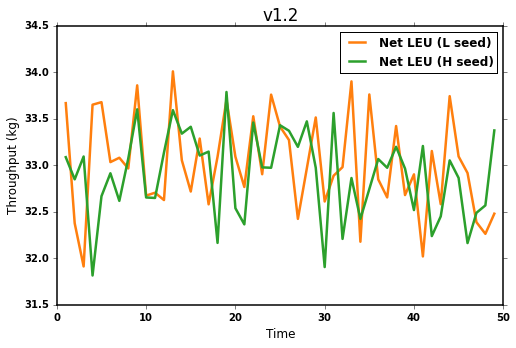

In [65]:
#plt.plot(raw_no_seed_16['Time'],(no_seed_LEU_tp), label='Net LEU (no seed)', color=tableau20[i_leu])
plt.plot(raw_L_seed_16['Time'],(L_seed_LEU_tp), label='Net LEU (L seed)', color=tableau20[i_leu+2])
plt.plot(raw_H_seed_16['Time'],(H_seed_LEU_tp), label='Net LEU (H seed)', color=tableau20[i_leu+4])
#plt.plot(raw_all_seed_16['Time'],(all_seed_LEU_tp), label='Net LEU (all seed)', color=tableau20[i_leu+6])

plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("v1.2")

In [66]:
no_seed_HEU_tp = raw_no_seed_18['Quantity'] - raw_no_seed_18['Quantity'].shift(1)
L_seed_HEU_tp = raw_L_seed_18['Quantity'] - raw_L_seed_18['Quantity'].shift(1)
H_seed_HEU_tp = raw_H_seed_18['Quantity'] - raw_H_seed_18['Quantity'].shift(1)
all_seed_HEU_tp = raw_all_seed_18['Quantity'] - raw_all_seed_18['Quantity'].shift(1)


For HEU signal, 'no seed' should match 'L seed' because both have deterministic HEU frequency (EveryRandomX) 
However, it does not match because currently RNG is still seeded only once per sim, and is being seeded by the LEU
trade because it comes first.  Therefore only LEU seed flag will alter the result of the simulations.

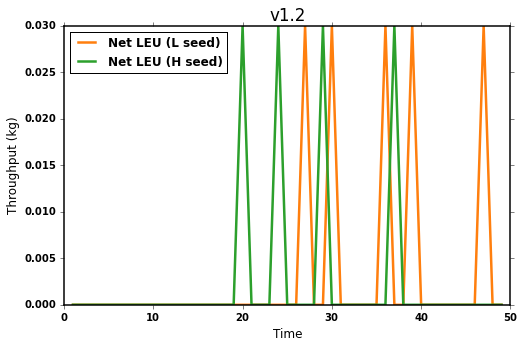

In [67]:
#plt.plot(raw_no_seed_16['Time'],(no_seed_HEU_tp), label='Net LEU (no seed)', color=tableau20[i_leu])
plt.plot(raw_L_seed_16['Time'],(L_seed_HEU_tp), label='Net LEU (L seed)', color=tableau20[i_leu+2])
plt.plot(raw_H_seed_16['Time'],(H_seed_HEU_tp), label='Net LEU (H seed)', color=tableau20[i_leu+4])
#plt.plot(raw_all_seed_16['Time'],(all_seed_HEU_tp), label='Net LEU (all seed)', color=tableau20[i_leu+6])

plt.legend(loc = 'best')
plt.xlabel('Time')
plt.ylabel('Throughput (kg)')
plt.title("v1.2")

Make a histogram of one example plot from dataset sent to UM

In [73]:
UM_dir = 'data/UM_data/initial_tests_v1.2/'
LEU_file = UM_dir + 'run-1-fac-16.dat'

ylab = "Throughput (kg)"
plot_dir = UM_dir + 'png/'
ps =1

In [74]:
from manip_data import trunc_flt
from manip_data import import_data_cyan

time, LEU_tp = import_data_cyan(LEU_file)

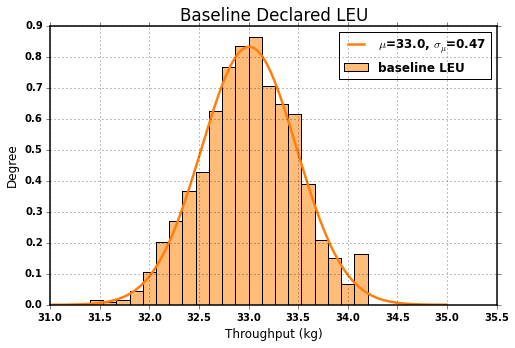

In [76]:
precision=2

bins=30
xmin=31
xmax=35

pre_hist = LEU_tp[:999].plot(kind='hist', bins=bins,color=tableau20[i_delta+1],
                            alpha=1.0,range=(xmin,xmax),normed=1,label='baseline LEU')

pre_mean = np.mean(LEU_tp[:999])
pre_variance = np.var(LEU_tp[:999])
pre_sigma = np.sqrt(pre_variance)
x = np.linspace(xmin,xmax,100)

plt.plot(x,mlab.normpdf(x,pre_mean,pre_sigma),color=tableau20[i_delta], 
         label='$\mu$=' + trunc_flt(pre_mean, precision) + ', $\sigma_{\mu}$=' + trunc_flt(pre_sigma, precision))

legend()
plt.xlabel(ylab)

plt.title("Baseline Declared LEU")

if ps == 1:
    savefig(plot_dir + 'baseline_LEU.png')
else:
    plt.title("Baseline Declared LEU")

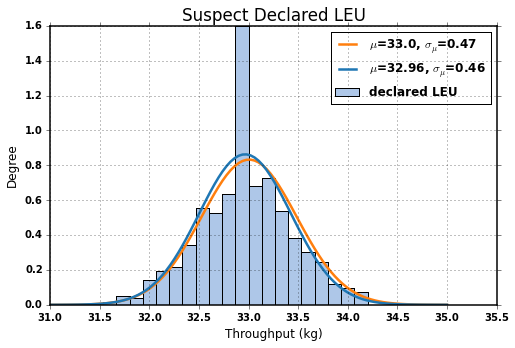

In [77]:

post_hist = LEU_tp[1000:].plot(kind='hist', bins=bins,color=tableau20[i_leu+1],
              alpha=1.0,range=(xmin,xmax),normed=1,label='declared LEU')

post_mean = np.mean(LEU_tp[1000:])
post_variance = np.var(LEU_tp[1000:])
post_sigma = np.sqrt(post_variance)
x = np.linspace(xmin,xmax,100)

plt.plot(x,mlab.normpdf(x,pre_mean,pre_sigma),color=tableau20[i_delta], 
         label='$\mu$=' + trunc_flt(pre_mean, precision) + ', $\sigma_{\mu}$=' + trunc_flt(pre_sigma, precision))

plt.plot(x,mlab.normpdf(x,post_mean,post_sigma),color=tableau20[i_leu], 
        label='$\mu$=' + trunc_flt(post_mean, precision) + ', $\sigma_{\mu}$=' + trunc_flt(post_sigma, precision))

plt.xlabel(ylab)


legend()
plt.xlabel(ylab)
plt.title("Suspect Declared LEU")
if ps == 1:
    savefig(plot_dir + 'suspect_LEU.png')
else:
    plt.title("Suspect Declared LEU")